In [1]:
import numpy as np
import pandas as pd
import os, sys
from IPython.display import display

from pycaret.utils import version

In [2]:
train = pd.read_csv('Il_10_DPC_SMOTE.csv')

In [3]:
from pycaret.classification import *

In [4]:
train.head()

,Class,GW,GV,GT,GS,GR,GQ,GP,GY,GG,GF,GE,GD,GC,GA,GN,GM,GL,GK,GI,GH,ME,MD,MG,MF,MA,MC,MM,ML,MN,MI,MH,MK,MT,MW,MV,MQ,MP,MS,MR,MY,FP,FQ,FR,FS,FT,FV,FW,FY,FA,FC,FD,FE,FF,FG,FH,FI,FK,FL,FM,FN,SY,SS,SR,SQ,SP,SW,SV,ST,SK,SI,SH,SN,SM,SL,SC,SA,SG,SF,SE,SD,YI,YH,YK,YM,YL,YN,YA,YC,YE,YD,YG,YF,YY,YQ,YP,YS,YR,YT,YW,YV,LF,LG,LD,LE,LC,LA,LN,LL,LM,LK,LH,LI,LV,LW,LT,LR,LS,LP,LQ,LY,RT,RV,RW,RP,RQ,RR,RS,RY,RD,RE,RF,RG,RA,RC,RL,RM,RN,RH,RI,RK,VH,VI,EM,EL,EN,EI,EH,EK,EE,ED,EG,EF,EA,EC,VM,EY,VN,ET,EW,EV,EQ,EP,ES,ER,VP,VQ,VR,VT,VW,KC,KA,KG,KF,KE,KD,KK,KI,KH,KN,KM,KL,KS,KR,KQ,KP,KW,KV,KT,KY,DN,DL,DM,DK,DH,DI,DF,DG,DD,DE,DC,DA,DY,DV,DW,DT,DR,DS,DP,DQ,QQ,QP,QS,QR,QT,QW,QV,QY,QA,QC,QE,QD,QG,QF,QI,QH,QK,QM,QL,QN,WG,WF,WE,WD,WC,WA,WN,WM,WL,WK,WI,WH,WW,WV,WT,WS,WR,WQ,WP,WY,PR,PS,PP,PQ,PV,PW,PT,PY,PC,PA,PF,PG,PD,PE,PK,PH,PI,PN,PL,PM,CK,CI,CH,CN,CM,CL,CC,CA,CG,CF,CE,CD,CY,CS,CR,CQ,CP,CW,CV,CT,IY,VA,VC,VD,VE,VF,VG,IQ,IP,IS,IR,VL,IT,IW,IV,II,IH,IK,VS,IM,IL,VV,IN,IA,VY,IC,IE,ID,IG,IF,HY,HR,HS,HP,HQ,HV,HW,HT,HK,HH,HI,HN,HL,HM,HC,HA,HF,HG,HD,HE,NH,NI,NK,NL,NM,NN,NA,NC,ND,NE,NF,NG,NY,NP,NQ,NR,NS,NT,NV,NW,TY,TV,TW,TT,TR,TS,TP,TQ,TN,TL,TM,TK,TH,TI,TF,TG,TD,TE,TC,TA,AA,AC,AE,AD,AG,AF,AI,AH,AK,AM,AL,AN,AQ,AP,AS,AR,AT,AW,AV,AY,VK
0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,0.0,0.0,0.999999,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,0.0,0.0,0.0,0.0,0.0,0.0

In [5]:
clf1 = setup (data = train,
             target = 'Class',  train_size = 0.80, feature_selection = True, feature_selection_threshold= 0.9, feature_selection_method= 'classic',  fold =5, data_split_stratify = True, session_id=124, log_experiment=True, experiment_name='il-10_transformd_Azure_dpc')

,Description,Value
0,session_id,124
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1636, 401)"
5,Missing Values,False
6,Numeric Features,397
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


2021/08/18 11:13:30 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8632,0.9458,0.8127,0.8945,0.8508,0.7250,0.7289,0.2260
et,Extra Trees Classifier,0.8624,0.9441,0.8222,0.8849,0.8519,0.7237,0.7261,0.2120
catboost,CatBoost Classifier,0.8455,0.9217,0.8143,0.8588,0.8350,0.6901,0.6922,3.3760
lightgbm,Light Gradient Boosting Machine,0.8440,0.9200,0.8079,0.8610,0.8328,0.6870,0.6892,0.2620
xgboost,Extreme Gradient Boosting,0.8425,0.9171,0.7984,0.8653,0.8298,0.6837,0.6865,0.3040
gbc,Gradient Boosting Classifier,0.8349,0.9118,0.8048,0.8463,0.8243,0.6687,0.6704,0.1860
qda,Quadratic Discriminant Analysis,0.8333,0.8847,0.7143,0.9238,0.8042,0.6635,0.6812,0.0560
knn,K Neighbors Classifier,0.8219,0.9006,0.7508,0.8632,0.8023,0.6416,0.6477,0.5120
dt,Decision Tree Classifier,0.7966,0.7960,0.7794,0.7956,0.7867,0.5925,0.5935,0.0260
lr,Logistic Regression,0.7898,0.8614,0.7667,0.7919,0.7780,0.5785,0.5803,0.8880


In [7]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8550,0.9385,0.8413,0.8548,0.8480,0.7093,0.7094
1,0.8511,0.9097,0.8175,0.8655,0.8408,0.7012,0.7023
2,0.8282,0.9251,0.8175,0.8240,0.8207,0.6559,0.6559
3,0.8506,0.9220,0.8175,0.8655,0.8408,0.7002,0.7013
4,0.8352,0.9049,0.7460,0.8952,0.8139,0.6683,0.6772
Mean,0.8440,0.9200,0.8079,0.8610,0.8328,0.6870,0.6892
SD,0.0104,0.0119,0.0323,0.0229,0.0131,0.0210,0.0199


In [8]:
predict_model(lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8476,0.9185,0.8291,0.8506,0.8397,0.6944,0.6946


,DL,RS,QP,VM,RG,FW,WQ_0.9999987483024597,RT,FY,PY,...,WE,NI,PP,WH,YI,WR,MQ,Class,Label,Score
0,0.000000,0.0,0.0,0.000000,0.999999,0.999999,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0.9333
1,0.000000,0.0,0.0,0.999830,0.963460,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.870249,1,1,0.9996
2,0.999853,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,0.9764
3,0.000000,0.0,0.0,0.999997,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,0.9679
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0.9852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,0.9989
324,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0.9846
325,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0.9366
326,0.000000,0.0,0.0,0.000000,0.963460,0.000000,0.0,0.0,0.0,0.0,...,0.999999,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,0.9995


In [9]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8664,0.9435,0.8492,0.8699,0.8594,0.7322,0.7324
1,0.8626,0.9365,0.8492,0.8629,0.8560,0.7246,0.7247
2,0.8588,0.9472,0.8016,0.8938,0.8452,0.7161,0.7197
3,0.8467,0.9451,0.8016,0.8707,0.8347,0.6923,0.6944
4,0.8774,0.9481,0.8095,0.9273,0.8644,0.7535,0.7592
Mean,0.8624,0.9441,0.8222,0.8849,0.8519,0.7237,0.7261
SD,0.0100,0.0041,0.0222,0.0236,0.0107,0.0200,0.0209


In [10]:
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8720,0.9386,0.8291,0.8973,0.8618,0.7429,0.7449


,DL,RS,QP,VM,RG,FW,WQ_0.9999987483024597,RT,FY,PY,...,WE,NI,PP,WH,YI,WR,MQ,Class,Label,Score
0,0.000000,0.0,0.0,0.000000,0.999999,0.999999,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0.72
1,0.000000,0.0,0.0,0.999830,0.963460,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.870249,1,1,0.99
2,0.999853,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,0.81
3,0.000000,0.0,0.0,0.999997,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,0.99
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,0.90
324,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0.98
325,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0.62
326,0.000000,0.0,0.0,0.000000,0.963460,0.000000,0.0,0.0,0.0,0.0,...,0.999999,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,1.00


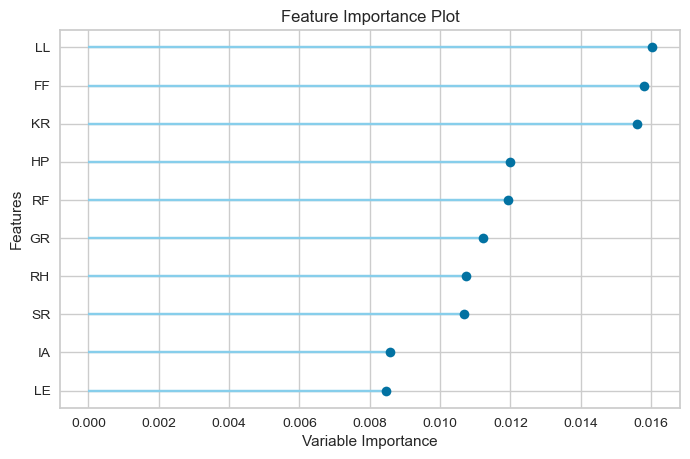

In [18]:
plot_model(estimator = et, plot = 'feature')

In [11]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8626,0.9346,0.8810,0.8409,0.8605,0.7253,0.7260
1,0.8397,0.9086,0.8095,0.8500,0.8293,0.6784,0.6791
2,0.8550,0.9369,0.8254,0.8667,0.8455,0.7090,0.7097
3,0.8352,0.9106,0.8016,0.8487,0.8245,0.6695,0.6705
4,0.8352,0.9179,0.7540,0.8879,0.8155,0.6684,0.6757
Mean,0.8455,0.9217,0.8143,0.8588,0.8350,0.6901,0.6922
SD,0.0112,0.0119,0.0410,0.0168,0.0160,0.0229,0.0218


In [12]:
predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8445,0.9259,0.8101,0.8591,0.8339,0.6880,0.6890


,DL,RS,QP,VM,RG,FW,WQ_0.9999987483024597,RT,FY,PY,...,WE,NI,PP,WH,YI,WR,MQ,Class,Label,Score
0,0.000000,0.0,0.0,0.000000,0.999999,0.999999,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0.8338
1,0.000000,0.0,0.0,0.999830,0.963460,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.870249,1,1,0.9812
2,0.999853,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,0.8195
3,0.000000,0.0,0.0,0.999997,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,0.7727
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0.8312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,0.9342
324,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0.9200
325,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0.6826
326,0.000000,0.0,0.0,0.000000,0.963460,0.000000,0.0,0.0,0.0,0.0,...,0.999999,0.0,0.0,0.0,0.0,0.0,0.000000,1,1,0.9540
